In [1]:
# If you'd like to install packages that aren't installed by default, list them here.
# This will ensure your notebook has all the dependencies and works everywhere

import sys
!{sys.executable} -m pip install xgboost sklearn

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
# Small datasets can be added to the project directly and imported by referring to the file name
data = pd.read_csv("iris.csv")

# Preview of Data
# There are 150 observations with 4 features each (sepal length, sepal width, petal length, petal width).
# There are no null values, so we don't have to worry about that.
# There are 50 observations of each species (setosa, versicolor, virginica).

# To import large datasets (over 5MBs), you can host them externally and import by directly referring to the URL.
# For example
# data = pd.read_csv('https://raw.githubusercontent.com/pandas-dev/pandas/master/pandas/tests/data/iris.csv')

<AxesSubplot:>

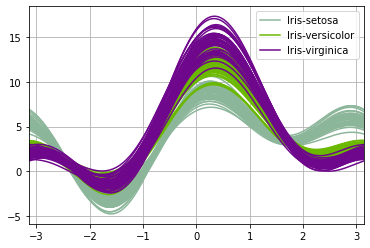

In [4]:
%matplotlib inline
from pandas.plotting import andrews_curves

andrews_curves(data, 'Name')

In [5]:
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Name         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data['Name'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Name, dtype: int64

In [9]:
data

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


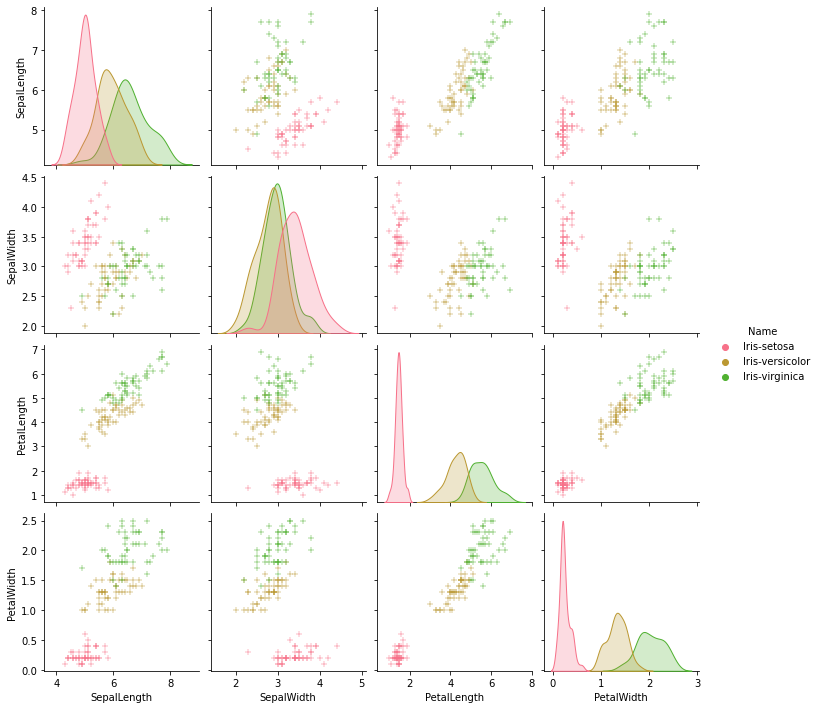

In [10]:
# data = data.drop('Id', axis=1)
g = sns.pairplot(data, hue='Name', markers='+')
plt.show()

In [11]:
# Data Visualization Observation
# After graphing the features in a pair plot, it is clear that the relationship between pairs of features of a iris-setosa (in pink) is distinctly different from those of the other two species.
# There is some overlap in the pairwise relationships of the other two species, iris-versicolor (brown) and iris-virginica (green).

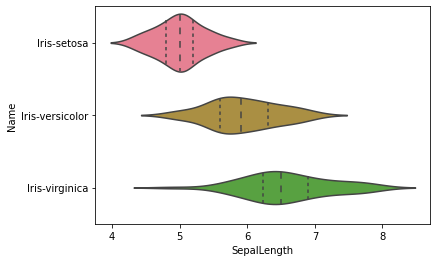

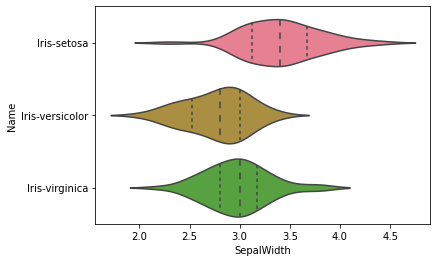

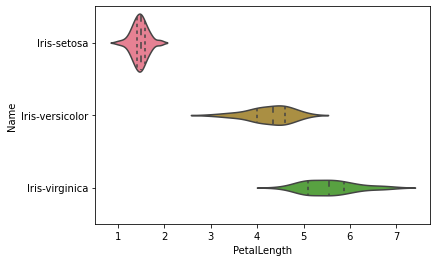

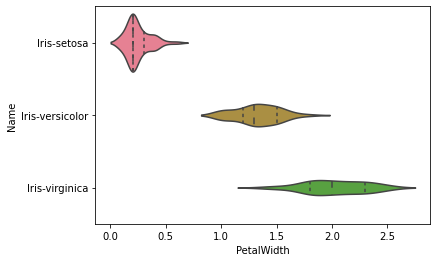

In [12]:
g = sns.violinplot(y='Name', x='SepalLength', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='Name', x='SepalWidth', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='Name', x='PetalLength', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='Name', x='PetalWidth', data=data, inner='quartile')
plt.show()

In [13]:
# Modeling with scikit-learn

In [14]:
# X = data.drop(['Id','Name'],axis=1)
X = data.drop(['Name'], axis=1)
y = data['Name']
print(X.head() , '\n')
print(X.shape  , '\n')
print(y.head() , '\n')
print(y.shape  , '\n')


   SepalLength  SepalWidth  PetalLength  PetalWidth
0          5.1         3.5          1.4         0.2
1          4.9         3.0          1.4         0.2
2          4.7         3.2          1.3         0.2
3          4.6         3.1          1.5         0.2
4          5.0         3.6          1.4         0.2 

(150, 4) 

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Name, dtype: object 

(150,) 



In [15]:
# Train and test on the same dataset
# This method is not suggested since the end goal is to predict iris species using a dataset the model has not seen before.
# There is also a risk of overfitting the training data.

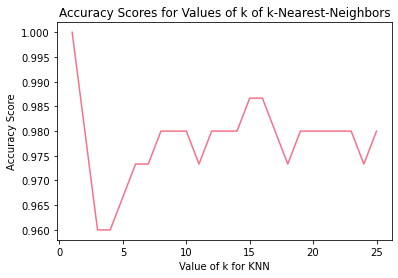

In [16]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(y,y_pred))
    #if k == 3:
    #    print(knn , '\n')
    #    print(knn.fit(X,y), '\n')
    #    print(y_pred, '\n')
    #    print(scores, '\n')
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [17]:
logreg = LogisticRegression()
print(logreg, '\n')
logreg.fit(X,y)
print(logreg.fit(X,y), '\n')
y_pred = logreg.predict(X)
print(metrics.accuracy_score(y,y_pred))

LogisticRegression() 

LogisticRegression() 

0.9733333333333334


In [18]:
# Split the dataset into a training set and a testing set
# Advantages
# - By splitting the dataset pseudo-randomly into a two separate sets, we can train using one set and test using another.
# - This ensures that we won't use the same observations in both sets.
# - More flexible and faster than creating a model using all of the dataset for training.
# Disadvantages
# - The accuracy scores for the testing set can vary depending on what observations are in the set.
# - This disadvantage can be countered using k-fold cross-validation.
# Notes
# - The accuracy score of the models depends on the observations in the testing set, which is determined by the seed of the pseudo-random number generator (random_state parameter).
# - As a model's complexity increases, the training accuracy (accuracy you get when you train and test the model on the same data) increases.
# - If a model is too complex or not complex enough, the testing accuracy is lower.
# - For KNN models, the value of k determines the level of complexity. A lower value of k means that the model is more complex.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(90, 4)
(90,)
(60, 4)
(60,)


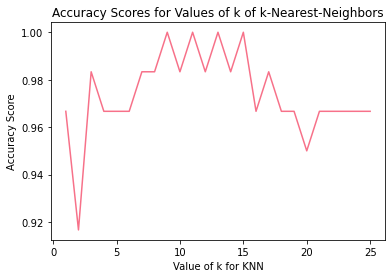

In [20]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    #if k == 3:
    #    print(knn , '\n')
    #    print(knn.fit(X_train,y_train), '\n')
    #    print(y_pred, '\n')
    #    print(scores, '\n')
        
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [21]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9833333333333333


In [22]:
# Choosing KNN to Model Iris Species Prediction with k = 12
# After seeing that a value of k = 12 is a pretty good number of neighbors for this model, I used it to fit the model for the entire dataset instead of just the training set.

In [23]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=12)

In [24]:
# make a prediction for an example of an out-of-sample observation
knn.predict([[6, 3, 4, 2]]) 

array(['Iris-versicolor'], dtype=object)